# Task1 Regression on Ames Housing Dataset
## Yawen Han (yh3069)

In [1]:
#load libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df = pd.read_excel("AmesHousing.xls")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Question 1.1

Plot the histogram of all the columns that are not "object" datatype below:

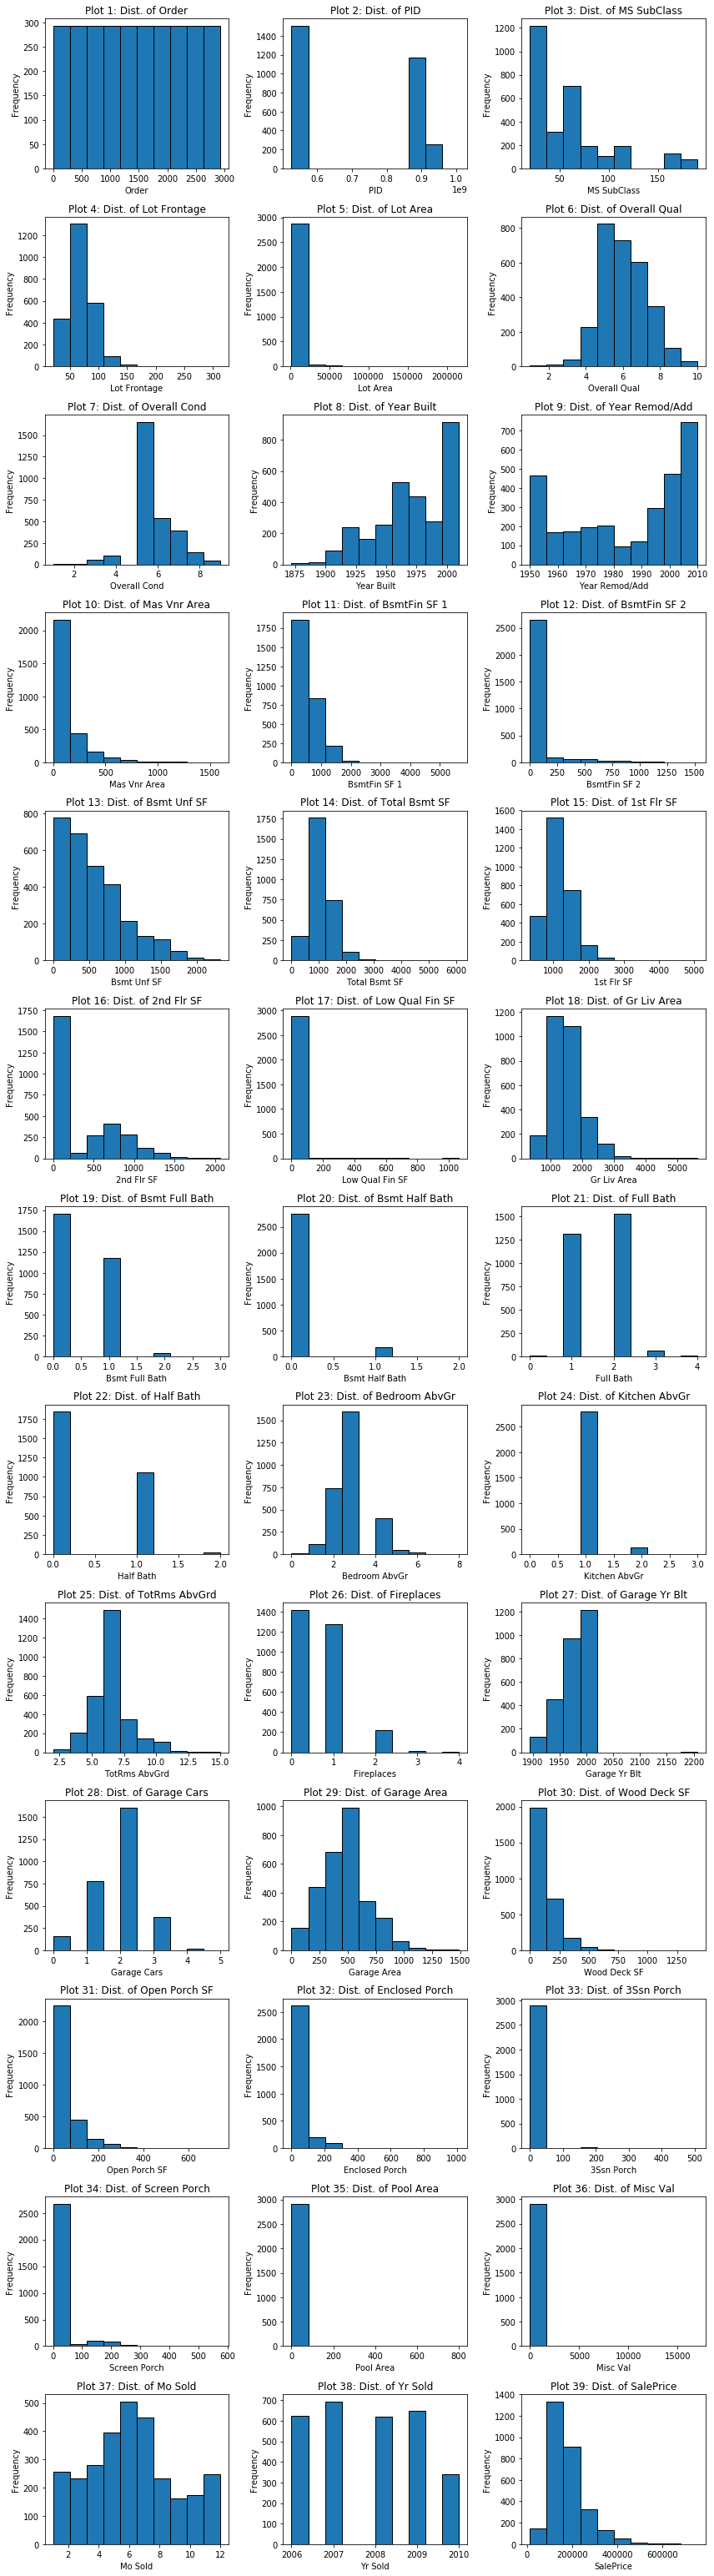

In [3]:
# univariate distribution plots
fig = plt.figure(figsize=(12,43))
count = 1
for i,column in enumerate(df.columns):
    #plot the histogram of all columns that are not object datatype
    if df.dtypes[column] != np.object:
        ax = fig.add_subplot(13, 3, count)
        ax.set_title("Plot %d: Dist. of %s" %(count,column))
        ax.set_xlabel(column)
        ax.set_ylabel("Frequency")
        ax.hist(df[column], edgecolor='black',bins=10)
        #count for subplot
        count+=1     
plt.tight_layout()
plt.show()


Plot 1~38 shows the distribution of each continuous features (**features that not a "object" datatype are considered to be continuous**). Plot 39 shows the distribution of the target-"SalePrice".

**Observation#1**: 

for some features, they have a highly right-skewed distributions, indicating some very large records exist in these features. After screening from the above plots, most of these features describe the "Area" information of the properties, eg. "Lot Area", "Mas Vnr Area", and "BsmtFin SF 1". As these extremem values probably affect the accuray when analyzing the dataset, we may treat them as outliers when preprocessing the data.

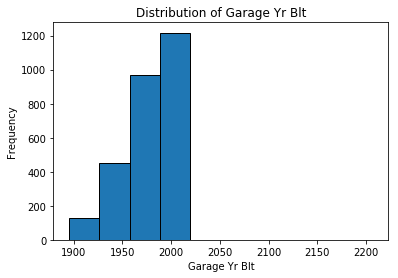

In [4]:
_ = plt.hist(df["Garage Yr Blt"], edgecolor = 'black')
_ = plt.title("Distribution of Garage Yr Blt")
_ = plt.xlabel("Garage Yr Blt")
_ = plt.ylabel("Frequency")

In [5]:
df[df["Garage Yr Blt"]>2010][["Order","PID","Garage Yr Blt"]]

,Order,PID,Garage Yr Blt
2260,2261,916384070,2207.0


**Observation#2**: 

in the distribution plot of feature "Garage Yr Blt", there are data value above 2010 observed. As the dataset contains the data up to year 2010, and "Garage Yr Blt" indicates "year garage was built", this records with "year 2207" should be wrong information. We may treat this record as wrong record, and delete it when analyzing the data.

## Question 1.2

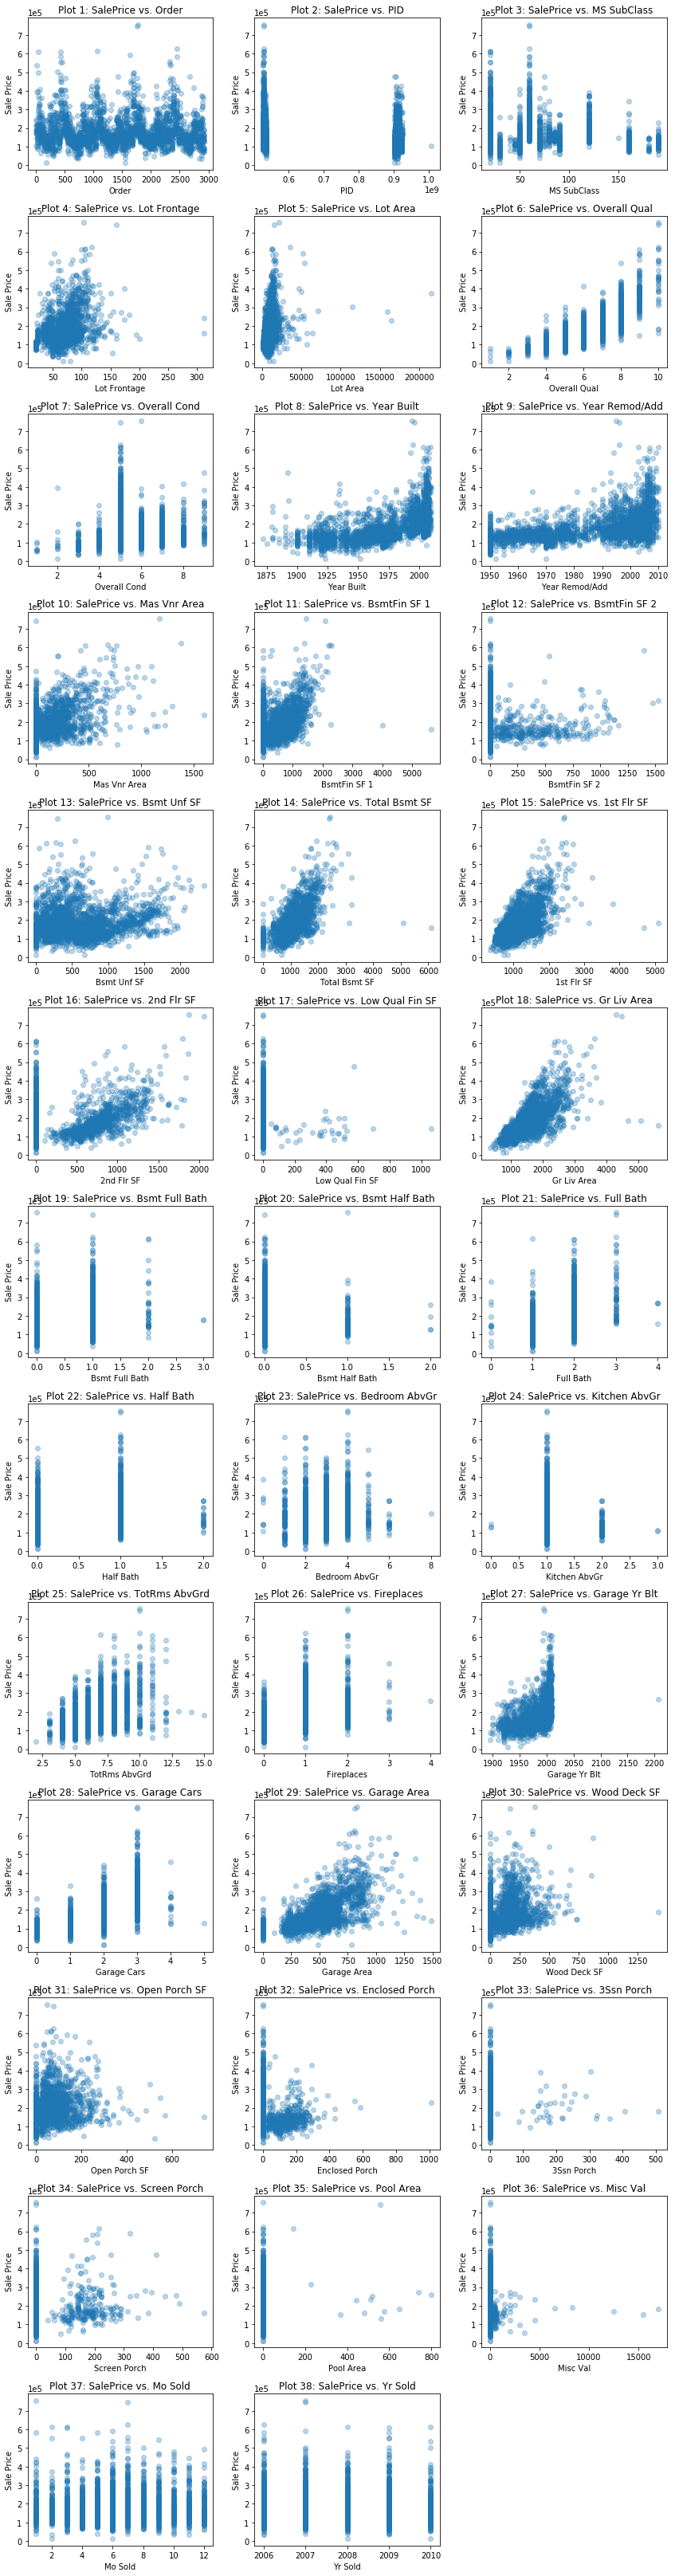

In [6]:
#target vs. continuous scatter plots
fig = plt.figure(figsize=(12,45))
count = 1
for i,column in enumerate(df.columns[:-1]):
    #plot the scatterplot of all columns that are not object datatype
    if df.dtypes[column] != np.object:
        ax = fig.add_subplot(13, 3, count)
        ax.set_title("Plot %d: SalePrice vs. %s" %(count,column))
        ax.set_xlabel(column)
        ax.set_ylabel("Sale Price")
        ax.scatter(df[column], df["SalePrice"],alpha=0.3)
        ax.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))
        #count for subplot
        count+=1     

plt.tight_layout()
plt.show()

The ScatterPlots 1~38 above shows the dependency distribution of the target on each continuous feature (**features that not a "object" datatype are considered to be continuous**). It's observed that some features are highly correlated with the target *(eg. plot18-"Gr Liv Area")*, while some not *(eg. plot1-"Order")*.

## Question 1.3

In [7]:
#load model libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]#features
y = df.iloc[:,-1]#target-SalePrice
#split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [8]:
#cv a linear regression model
r2_scores = []
#loop all the categorical columns
for i,column in enumerate(X_train):
    if X_train.dtypes[column]==np.object:
        #fill the "NaN" in categorical columns with string "Unknown"
        X_train[column].fillna("Unknown",inplace=True)
        #one-hot encoded the given column
        X_train_ohe = OneHotEncoder().fit_transform(X_train[column].to_frame())
        #cross-validation scores
        scores = cross_val_score(LinearRegression(),X_train_ohe,y_train,cv=5,scoring="r2")
        r2_scores.append(np.mean(scores))
#get top 3 R^2 value of categorical vars and target
top3 = sorted([(x,i) for (i,x) in enumerate(r2_scores)],reverse=True)[:3]       
       

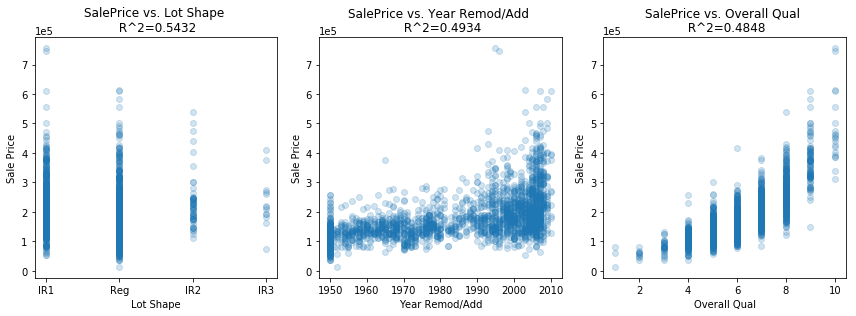

In [9]:
#scatter plot for top 3 categorical vs. target
fig = plt.figure(figsize=(12,4.5))
count = 1
for (x,i) in top3:
    ax = fig.add_subplot(1, 3, count)
    ax.set_title("SalePrice vs. %s \n R^2=%.4f" %(X_train.columns[i],x))
    ax.set_xlabel(X_train.columns[i])
    ax.set_ylabel("Sale Price")
    ax.scatter(X_train.iloc[:,i], y_train, alpha=0.2)
    ax.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))
    #count for subplot
    count+=1     
plt.tight_layout()
plt.show()
    

Visualize the relationship of top 3 categorical variables that provide the best R^2 value with the target. These top 3 categoricl variables are: "Lot Shape", "Year Remod/Add", and "Overall Qual".

## Question 1.4

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [11]:
#find categorical and numerical features
categorical_features = X_train.loc[:,X_train.dtypes==np.object].columns.tolist()
numerical_features = X_train.loc[:,X_train.dtypes!=np.object].columns.tolist()


In [12]:
#Numerical features: handling missing value, scaler
numerical_transformer_scaled = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
#Numerical features: handling missing value
numerical_transformer_unscaled = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
#categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown="ignore"))])
#column transformer: scaled numerical & categorical
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_scaled, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
#column transformer: unscaled numerical & categorical
preprocessor_unscaled = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_unscaled, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#build Linear Regression model
lr_model_scaled = Pipeline(steps=[('preprocessor_scaled', preprocessor_scaled),('lr', LinearRegression())])
lr_model_unscaled = Pipeline(steps=[('preprocessor_unscaled', preprocessor_unscaled),('lr', LinearRegression())])
#build Ridge model
rg_model_scaled = Pipeline(steps=[('preprocessor_scaled', preprocessor_scaled),('rg', Ridge())])
rg_model_unscaled = Pipeline(steps=[('preprocessor_unscaled', preprocessor_unscaled),('rg', Ridge())])
#build Lasso model
ls_model_scaled = Pipeline(steps=[('preprocessor_scaled', preprocessor_scaled),('ls', Lasso())])
ls_model_unscaled = Pipeline(steps=[('preprocessor_unscaled', preprocessor_unscaled),('ls', Lasso())])
#build ElasticNet model
en_model_scaled = Pipeline(steps=[('preprocessor_scaled', preprocessor_scaled),('en', ElasticNet())])
en_model_unscaled = Pipeline(steps=[('preprocessor_unscaled', preprocessor_unscaled),('en', ElasticNet())])


In [14]:
#Linear Regression:compute scaled/unscaled scores
lr_scores_scaled = cross_val_score(lr_model_scaled, X_train, y_train)
lr_scores_unscaled = cross_val_score(lr_model_unscaled, X_train, y_train)
#Ridge:compute scaled/unscaled scores
rg_scores_scaled = cross_val_score(rg_model_scaled, X_train, y_train)
rg_scores_unscaled = cross_val_score(rg_model_unscaled, X_train, y_train)
#Lasso:compute scaled/unscaled scores
ls_scores_scaled = cross_val_score(ls_model_scaled, X_train, y_train)
ls_scores_unscaled = cross_val_score(ls_model_unscaled, X_train, y_train)
#ElasticNet:compute scaled/unscaled scores
en_scores_scaled = cross_val_score(en_model_scaled, X_train, y_train)
en_scores_unscaled = cross_val_score(en_model_unscaled, X_train, y_train)


In [15]:
#show the mean scaled/unscaled score as a table
scores = [['Scaled',np.mean(lr_scores_scaled),np.mean(rg_scores_scaled),np.mean(ls_scores_scaled),np.mean(en_scores_scaled)],
        ['Unscaled',np.mean(lr_scores_unscaled),np.mean(rg_scores_unscaled),np.mean(ls_scores_unscaled),np.mean(en_scores_unscaled)]]
df_scores = pd.DataFrame(scores,columns=['Option','LinearRegression','Ridge','Lasso','ElasticNet'])
df_scores.set_index("Option")

,LinearRegression,Ridge,Lasso,ElasticNet
Option,,,,
Scaled,0.899310,0.907095,0.900377,0.868454
Unscaled,0.742864,-0.000955,0.900372,0.872199


From the table above, it is observed that the **Scaled** models has a higher score compared to unscaled models. Especially for "LinearRegression" and "Ridge" model, the cross-validation scores have great improvement after scaling the continuous features. However, the cross-validation scores for "Lasso" and "ElasticNet" model do not show obvious improvement.

## Question 1.5

In [16]:
from sklearn.model_selection import GridSearchCV

#scaled X_train data
fit_scaled = preprocessor_scaled.fit(X_train)
X_scaled = fit_scaled.transform(X_train)

#choice of alpha parameter
alpha = np.logspace(-1,1,num=10)
params={'alpha': alpha}

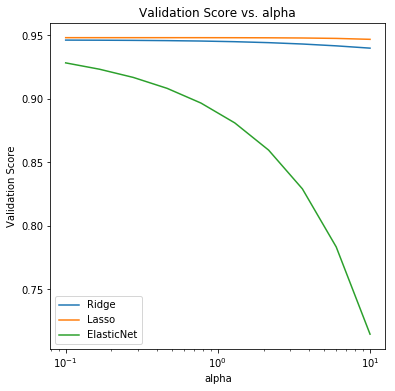

In [17]:

coefficients = []
#plot Score vs. alpha
fig = plt.figure(figsize=(6,6))
count = 1
models = [Ridge(),Lasso(),ElasticNet()]
label = ["Ridge","Lasso","ElasticNet"]
for model in models:
    grid = GridSearchCV(model,param_grid=params)
    grid.fit(X_scaled, y_train)
    #gridserach results
    results = grid.cv_results_
    _ = plt.plot(alpha, results["mean_train_score"],label=label[count-1])
    _ = plt.title("Validation Score vs. alpha")
    _ = plt.xlabel("alpha")
    _ = plt.ylabel("Validation Score")
    _ = plt.xscale("log")
    count += 1
    #best model coefficients 
    coefficients.append(grid.best_estimator_.coef_)
plt.legend(loc='lower left')
plt.show()


From the "Validation Score vs. alpha" plot above, the cross-validation scores do not change a lot for "Ridge" and "Lasso" model. On opposite, the cross-validation scores of "ElasticNet" model shows a obvious decrement as alpha increases.

## Question 1.6

In [18]:
#get the categorical column names after one-hot encoding
#temp one-hot encoding used for finding column names
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown="ignore"), 
                                                categorical_features)])
catg_ohe = preprocessor.fit(X_train).get_feature_names()
catg_ohe = pd.DataFrame(catg_ohe)
#remove the prefix "onehot_"
catg_ohe = catg_ohe.applymap(lambda x: str(x).lstrip("onehot_"))
#replace prefix "x0,x1,x2..." as original column names
for (i,name) in enumerate(categorical_features):
    catg_ohe = catg_ohe.applymap(lambda x: str(x).replace("x"+str(i),name))

#the feature name list contaning all feature names 
ohe_feature_names = numerical_features + catg_ohe.iloc[:,0].tolist()


In [19]:
#define plot_scatter function to plot feature coefficients vs. feature index
def plot_scatter(i):
    ax = fig.add_subplot(3, 2, 2*i+1)
    ax.scatter(range(len(coefficients[1])), coefficients[i],c=np.sign(coefficients[i]), cmap="bwr_r",alpha=0.3)
    ax.set_title("%s: Coefficients vs. Features"%label[i])
    ax.set_xlabel("Features")
    ax.set_ylabel("Coefficients")
    ax.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))
    

In [20]:
#define plot_barh function to plot top10 absolute coefficients feature values
def plot_barh(i):
    ax = fig.add_subplot(3, 2, 2*i+2)
    top10 = sorted([(abs(x),j) for (j,x) in enumerate(coefficients[i])],reverse=True)[:10]
    val = []
    top10_columns = []
    for x in top10:    
        #top10 coefficients
        val.append(coefficients[i][x[1]])
        #top10 column names
        top10_columns.append(ohe_feature_names[x[1]])
    #plot the top10coefficients horizontally
    ax.barh(top10_columns[::-1],val[::-1])
    ax.set_title("%s: Top10 Important Features"%label[i])
    ax.set_xlabel("Coefficients")
    ax.ticklabel_format(axis='x', style='sci',scilimits=(-2,2))
    

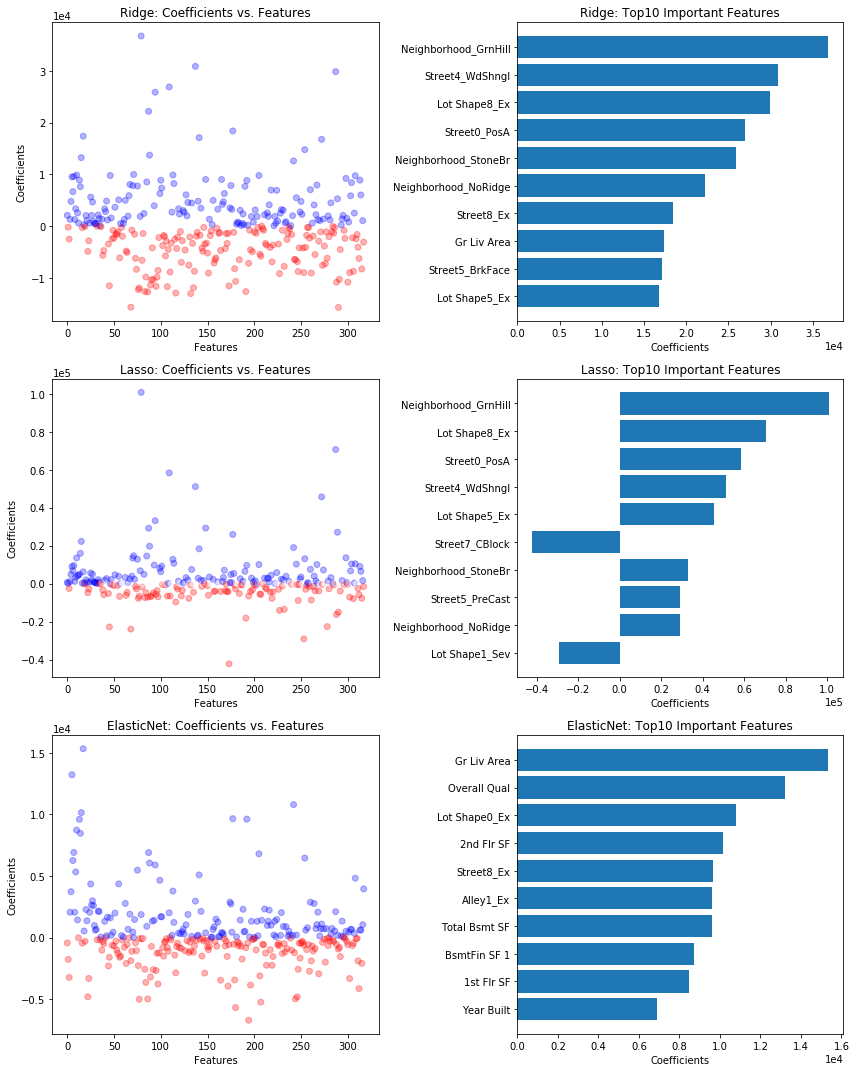

In [21]:
#plot scatterplots on left, bar charts on right for three models
fig = plt.figure(figsize=(12,15))
for i in range(3):
    plot_scatter(i)
    plot_barh(i)
plt.tight_layout()
plt.show()

The scatter plots on the left shows the coefficients of each feature vs. their feature index. The horizontal bar charts on the right shows the top 10 features with absolute coefficients.

Compared three scatter plots and bar plots above, "Ridge" and "Lasso" have similar coefficients distribution, indicating they have some agreement on the coefficients importance. However, "ElasticNet" model appears larger difference with them.